In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

## **Task 1 - Static IMU experiment**

In [261]:
df_task1 = pd.read_csv('dataset1/data/task1/imu_reading_task1.csv', header=None)

print(df_task1.head())
print(df_task1.info())

             0         1         2         3         4         5         6   \
0  1.604405e+09  0.004636 -0.006466  1.024190 -0.097313 -0.036616 -0.064628   
1  1.604405e+09  0.004514 -0.005856  1.024068 -0.028416 -0.029407  0.215372   
2  1.604405e+09  0.003416 -0.005856  1.023702 -0.061279  0.032908  0.180372   
3  1.604405e+09  0.006100 -0.004392  1.022848  0.019597 -0.090760  0.495372   
4  1.604405e+09  0.006954 -0.007076  1.026996 -0.183591 -0.035036 -0.169627   

         7         8         9         10        11  
0  0.043803  0.067217 -0.367875  0.945630  0.589301  
1 -0.376198 -0.177783 -0.365536  0.946945  0.586524  
2 -0.096198 -0.072782 -0.365536  0.946945  0.586524  
3 -0.971198 -0.247782 -0.371529  0.944022  0.591055  
4  1.058803  0.137217 -0.371529  0.944022  0.591055  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       778 non-n

### **Task 1a**
From the measurement record log file visualize the data. Read the Appendix 5.3.1 in order to understand what each column represents. What do you observe? Summarize what you have understood and write it down in your report.

In [262]:
df_task1.columns = [
    'timestamp_ms',
    'ax_g', 'ay_g', 'az_g',
    'roll_deg', 'pitch_deg',
    'gx_deg_s', 'gy_deg_s', 'gz_deg_s',
    'mx_gauss', 'my_gauss', 'mz_gauss'
]

df_task1['timestamp_s'] = df_task1['timestamp_ms'] / 1000.0

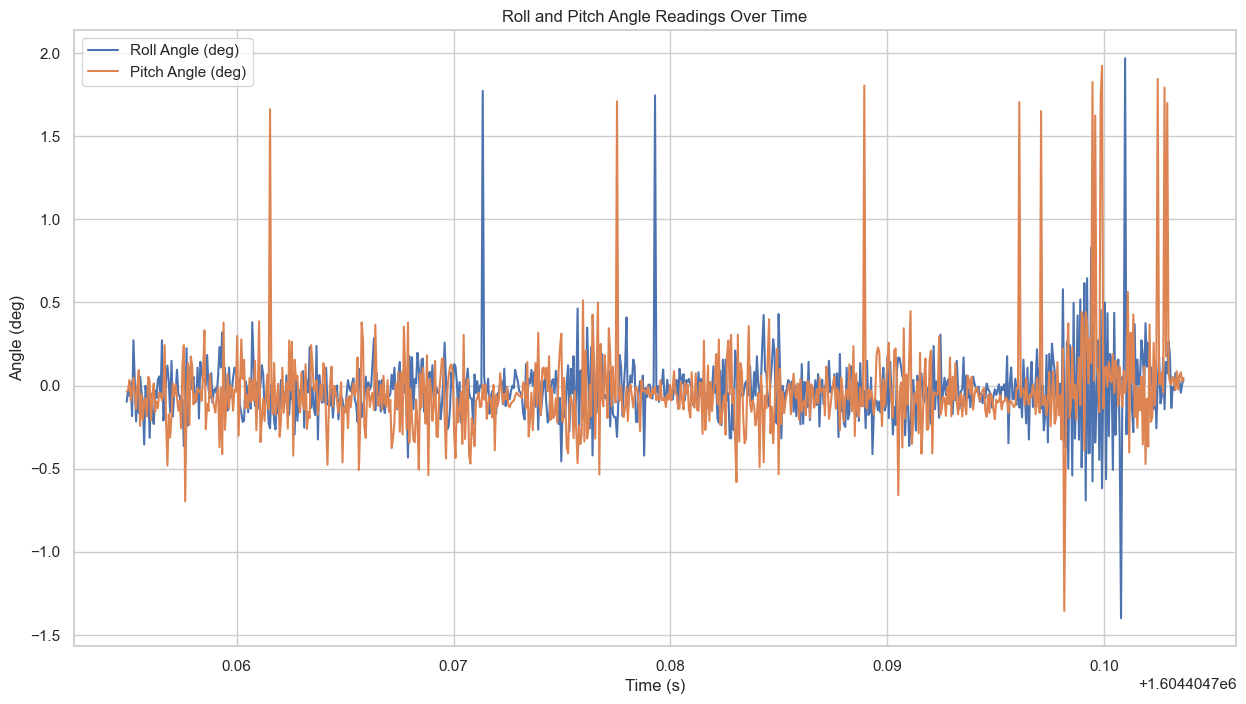

In [263]:
plt.figure(figsize=(15, 8))

plt.plot(df_task1['timestamp_s'], df_task1['roll_deg'], label='Roll Angle (deg)')
plt.plot(df_task1['timestamp_s'], df_task1['pitch_deg'], label='Pitch Angle (deg)')

plt.title('Roll and Pitch Angle Readings Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

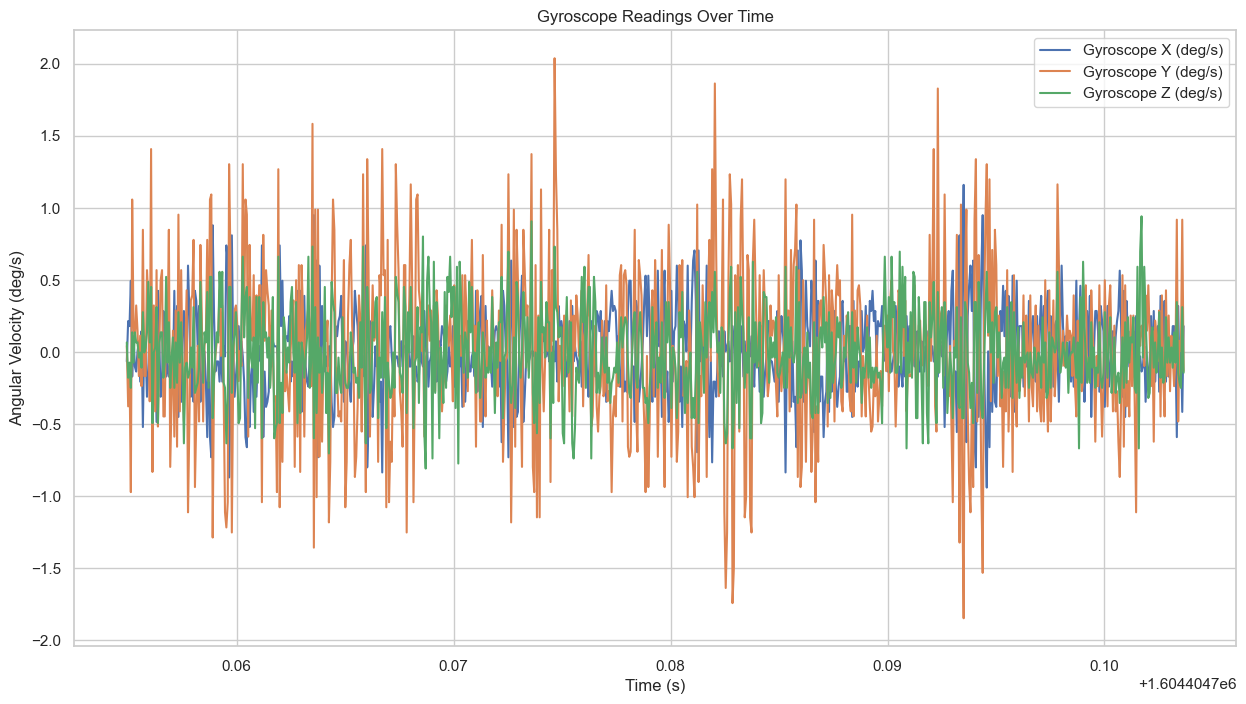

In [264]:
plt.figure(figsize=(15, 8))

plt.plot(df_task1['timestamp_s'], df_task1['gx_deg_s'], label='Gyroscope X (deg/s)')
plt.plot(df_task1['timestamp_s'], df_task1['gy_deg_s'], label='Gyroscope Y (deg/s)')
plt.plot(df_task1['timestamp_s'], df_task1['gz_deg_s'], label='Gyroscope Z (deg/s)')

plt.title('Gyroscope Readings Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

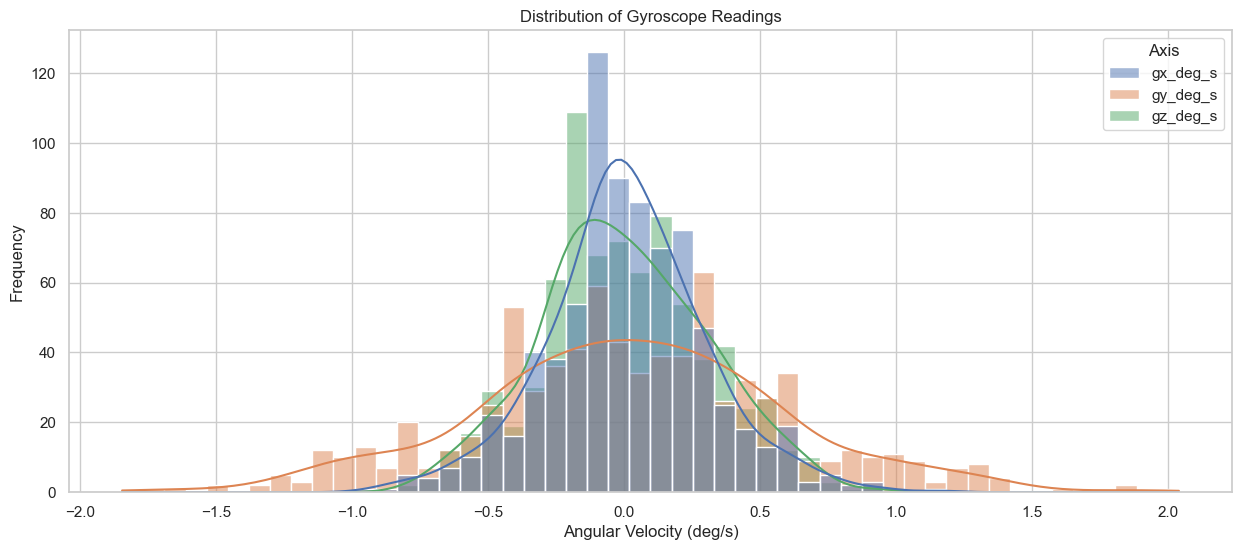

In [265]:
# Melt the DataFrame for easier plotting with seaborn
gyro_data = df_task1.melt(id_vars=['timestamp_s'], value_vars=['gx_deg_s', 'gy_deg_s', 'gz_deg_s'],
                    var_name='Axis', value_name='Angular Velocity (deg/s)')

plt.figure(figsize=(15, 6))
sns.histplot(data=gyro_data, x='Angular Velocity (deg/s)', hue='Axis', kde=True, bins=50)
plt.title('Distribution of Gyroscope Readings')
plt.xlabel('Angular Velocity (deg/s)')
plt.ylabel('Frequency')
plt.show()

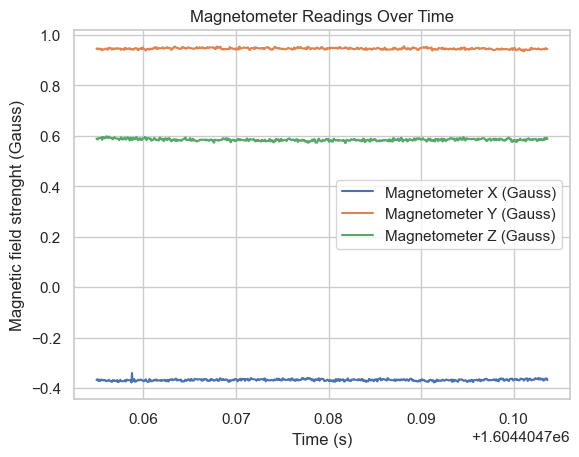

In [286]:
plt.plot(df_task1['timestamp_s'], df_task1['mx_gauss'], label='Magnetometer X (Gauss)')
plt.plot(df_task1['timestamp_s'], df_task1['my_gauss'], label='Magnetometer Y (Gauss)')
plt.plot(df_task1['timestamp_s'], df_task1['mz_gauss'], label='Magnetometer Z (Gauss)')

plt.title('Magnetometer Readings Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field strenght (Gauss)')
plt.legend()
plt.grid(True)
plt.show()

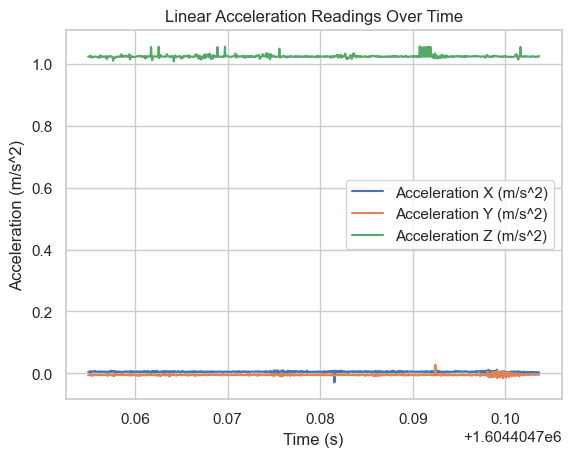

In [267]:
plt.plot(df_task1['timestamp_s'], df_task1['ax_g'], label='Acceleration X (m/s^2)')
plt.plot(df_task1['timestamp_s'], df_task1['ay_g'], label='Acceleration Y (m/s^2)')
plt.plot(df_task1['timestamp_s'], df_task1['az_g'], label='Acceleration Z (m/s^2)')

plt.title('Linear Acceleration Readings Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

### **Task 1b**
Determine the bias and variance of the gyroscope in the IMU sensors and write down the result in your report.

In [268]:
bias = {
    'gx_deg_s': df_task1['gx_deg_s'].mean(),
    'gy_deg_s': df_task1['gy_deg_s'].mean(),
    'gz_deg_s': df_task1['gz_deg_s'].mean()
}

# Calculate variance for each gyroscope axis
variance = {
    'gx_deg_s': df_task1['gx_deg_s'].var(),
    'gy_deg_s': df_task1['gy_deg_s'].var(),
    'gz_deg_s': df_task1['gz_deg_s'].var()
}

print("Gyroscope Bias (Mean):")
for axis, value in bias.items():
    print(f"{axis}: {value:.6f} deg/s")

print("\nGyroscope Variance:")
for axis, value in variance.items():
    print(f"{axis}: {value:.6f} (deg/s)^2")

Gyroscope Bias (Mean):
gx_deg_s: 0.008971 deg/s
gy_deg_s: 0.016855 deg/s
gz_deg_s: -0.001298 deg/s

Gyroscope Variance:
gx_deg_s: 0.085087 (deg/s)^2
gy_deg_s: 0.327209 (deg/s)^2
gz_deg_s: 0.094086 (deg/s)^2


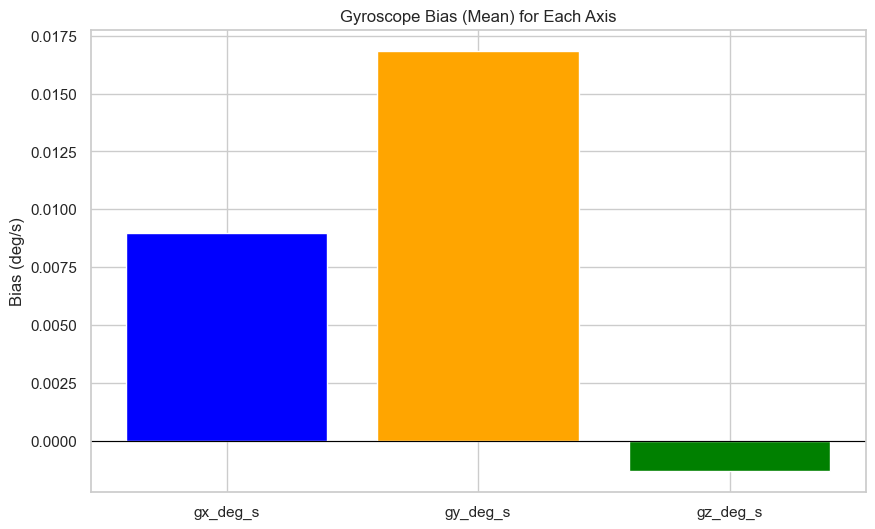

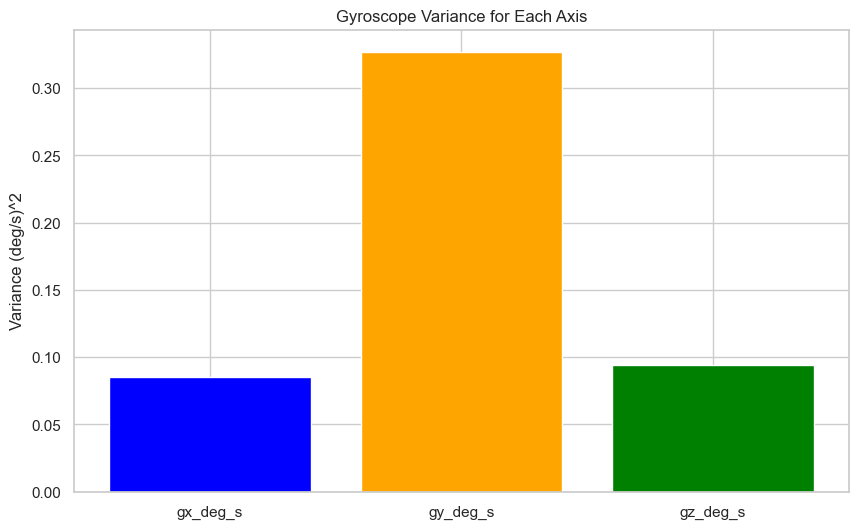

In [269]:
# Bar plot for bias
plt.figure(figsize=(10, 6))
axes = ['gx_deg_s', 'gy_deg_s', 'gz_deg_s']
bias_values = [bias[axis] for axis in axes]
plt.bar(axes, bias_values, color=['blue', 'orange', 'green'])
plt.title('Gyroscope Bias (Mean) for Each Axis')
plt.ylabel('Bias (deg/s)')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

# Bar plot for variance
plt.figure(figsize=(10, 6))
variance_values = [variance[axis] for axis in axes]
plt.bar(axes, variance_values, color=['blue', 'orange', 'green'])
plt.title('Gyroscope Variance for Each Axis')
plt.ylabel('Variance (deg/s)^2')
plt.show()

## **Task 2 - IMU calibration (accelerometer calibration)**

In [270]:
df_task2 = pd.read_csv('dataset1/data/task2/imu_calibration_task2.csv', header=None)

print(df_task2.head())
print(df_task2.info())

df_task2.columns = [
    'timestamp_ms',
    'ax_g', 'ay_g', 'az_g',
    'roll_deg', 'pitch_deg',
    'gx_deg_s', 'gy_deg_s', 'gz_deg_s',
    'mx_gauss', 'my_gauss', 'mz_gauss'
]

             0         1         2         3         4         5         6   \
0  1.605536e+09  0.002684  0.020618  1.026386 -0.140048 -0.110006 -0.065223   
1  1.605536e+09 -0.000122  0.020008  1.025776  0.287279  0.027139  0.074777   
2  1.605536e+09  0.001586  0.020496  1.025776 -0.006209 -0.048023  0.144778   
3  1.605536e+09 -0.029402  0.018544  1.025044 -0.118694  0.068147 -0.170222   
4  1.605536e+09  0.001830  0.020862  1.023702 -0.090047 -0.266341  0.074777   

         7         8         9         10        11  
0  0.671335 -0.071243 -0.704765  0.945045  0.596609  
1  0.181335 -0.141242 -0.704765  0.945045  0.596609  
2  0.076335 -0.106243 -0.696434  0.945630  0.597048  
3  0.566335 -0.036242 -0.696726  0.940953  0.601725  
4  0.356335 -0.141242 -0.696726  0.940953  0.601725  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2881 no

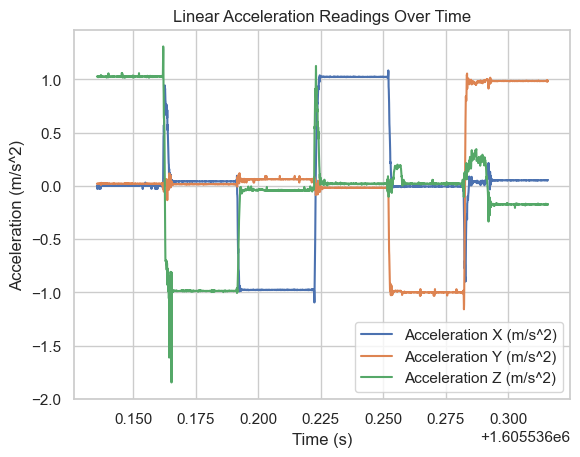

In [287]:
plt.plot(df_task2['timestamp_s'], df_task2['ax_g'], label='Acceleration X (m/s^2)')
plt.plot(df_task2['timestamp_s'], df_task2['ay_g'], label='Acceleration Y (m/s^2)')
plt.plot(df_task2['timestamp_s'], df_task2['az_g'], label='Acceleration Z (m/s^2)')

plt.title('Linear Acceleration Readings Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [271]:
df_task2['timestamp_s'] = df_task2['timestamp_ms'] / 1000.0

measurement_order = ['+Z', '-Z', '+X', '-X', '+Y', '-Y']
measurement_size = 6 

# Verify that the number of rows is a multiple of measurement_size
total_measurements = len(df_task2) // measurement_size

if len(df_task2) % measurement_size != 0:
    print("Warning: Log file does not contain complete measurement cycles.")
    total_measurements = len(df_task2) // measurement_size

print(f"Total complete measurement cycles: {total_measurements}")

Total complete measurement cycles: 480


In [272]:
# Initialize dictionaries to store au and ad for each axis
au = {'x': [], 'y': [], 'z': []}
ad = {'x': [], 'y': [], 'z': []}

# Extract au and ad for each axis from each measurement cycle
for i in range(total_measurements):
    start_idx = i * measurement_size
    end_idx = start_idx + measurement_size
    measurement = df_task2.iloc[start_idx:end_idx]

    # Extract readings
    # Measurement order: +Z, -Z, +X, -X, +Y, -Y
    # Each position corresponds to a rotation along an axis

    # +Z (Up position for Z axis)
    pos_up = measurement.iloc[0]
    # -Z (Down position for Z axis)
    pos_down = measurement.iloc[1]

    # +X (Up position for X axis)
    pos_up_x = measurement.iloc[2]
    # -X (Down position for X axis)
    pos_down_x = measurement.iloc[3]

    # +Y (Up position for Y axis)
    pos_up_y = measurement.iloc[4]
    # -Y (Down position for Y axis)
    pos_down_y = measurement.iloc[5]

    # For Z axis
    au['z'].append(pos_up['az_g'])
    ad['z'].append(pos_down['az_g'])

    # For X axis
    au['x'].append(pos_up_x['ax_g'])
    ad['x'].append(pos_down_x['ax_g'])

    # For Y axis
    au['y'].append(pos_up_y['ay_g'])
    ad['y'].append(pos_down_y['ay_g'])


In [273]:
# Calculate mean au and ad for each axis
mean_au = {axis: sum(au[axis]) / len(au[axis]) for axis in au}
mean_ad = {axis: sum(ad[axis]) / len(ad[axis]) for axis in ad}

print("\nMean Accelerations - Up Position (au):")
for axis in mean_au:
    print(f"{axis.upper()} axis: {mean_au[axis]:.6f} g")

print("\nMean Accelerations - Down Position (ad):")
for axis in mean_ad:
    print(f"{axis.upper()} axis: {mean_ad[axis]:.6f} g")



Mean Accelerations - Up Position (au):
X axis: 0.015675 g
Y axis: 0.025644 g
Z axis: -0.006735 g

Mean Accelerations - Down Position (ad):
X axis: 0.014831 g
Y axis: 0.026162 g
Z axis: -0.008262 g


In [274]:
# Calculate gain (ki) and bias (bi) for each axis
g = 1.0  # Gravity in g units

gain = {}
bias = {}

for axis in ['x', 'y', 'z']:
    gain[axis] = (mean_au[axis] - mean_ad[axis]) / (2 * g)
    bias[axis] = (mean_au[axis] + mean_ad[axis]) / 2

print("\nCalculated Gain (ki) for Each Axis:")
for axis in gain:
    print(f"{axis.upper()} axis: {gain[axis]:.6f}")

print("\nCalculated Bias (bi) for Each Axis:")
for axis in bias:
    print(f"{axis.upper()} axis: {bias[axis]:.6f} g")



Calculated Gain (ki) for Each Axis:
X axis: 0.000422
Y axis: -0.000259
Z axis: 0.000763

Calculated Bias (bi) for Each Axis:
X axis: 0.015253 g
Y axis: 0.025903 g
Z axis: -0.007498 g


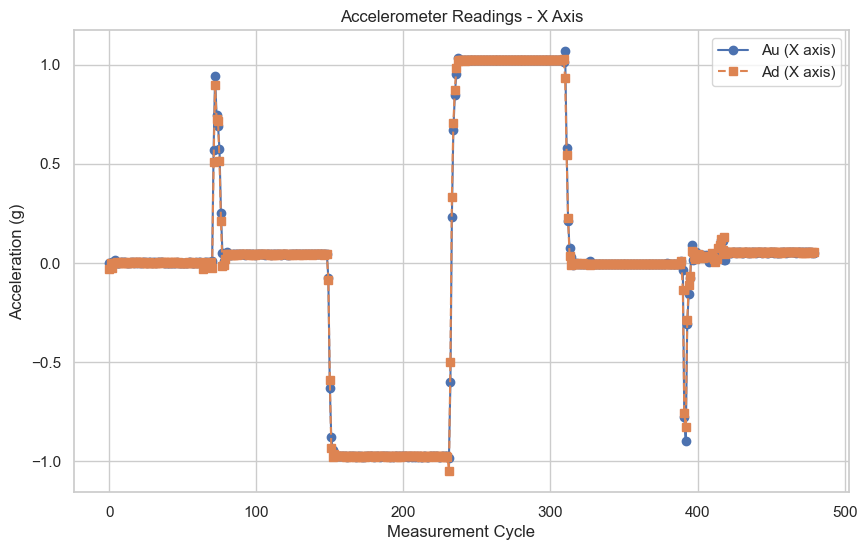

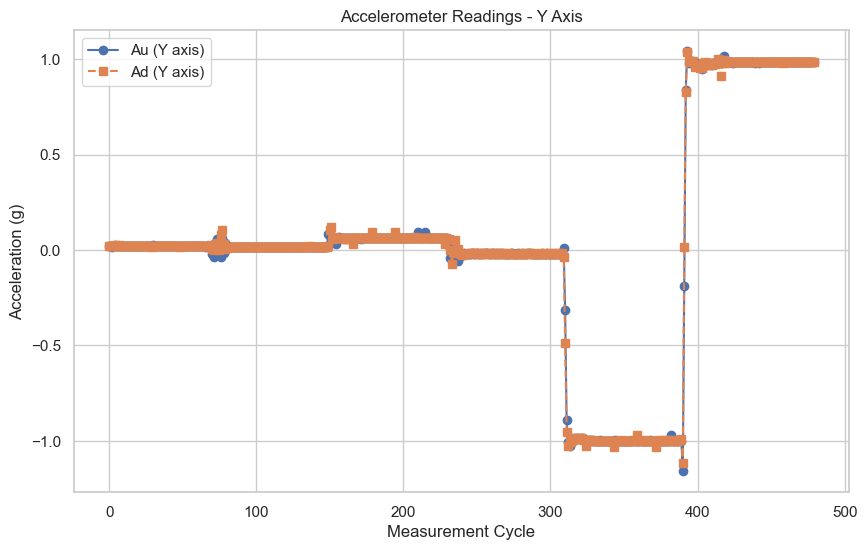

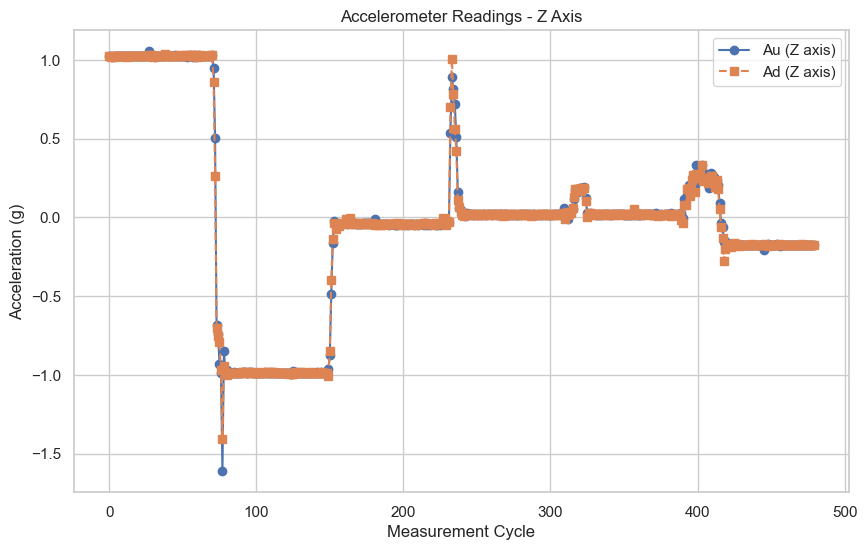

In [275]:
# Plot Accelerometer Readings for Each Axis
axes = ['x', 'y', 'z']
positions = ['Up', 'Down']

for axis in axes:
    plt.figure(figsize=(10, 6))
    plt.plot(range(total_measurements), au[axis], 'o-', label=f'Au ({axis.upper()} axis)')
    plt.plot(range(total_measurements), ad[axis], 's--', label=f'Ad ({axis.upper()} axis)')
    plt.title(f'Accelerometer Readings - {axis.upper()} Axis')
    plt.xlabel('Measurement Cycle')
    plt.ylabel('Acceleration (g)')
    plt.legend()
    plt.grid(True)
    plt.show()


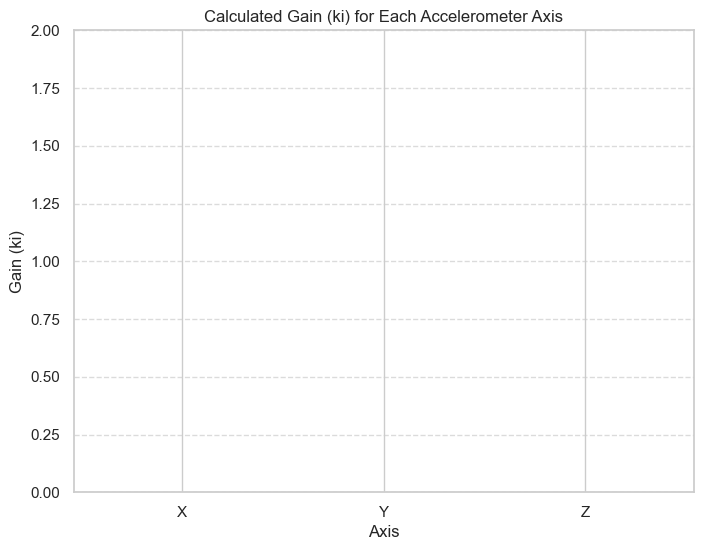

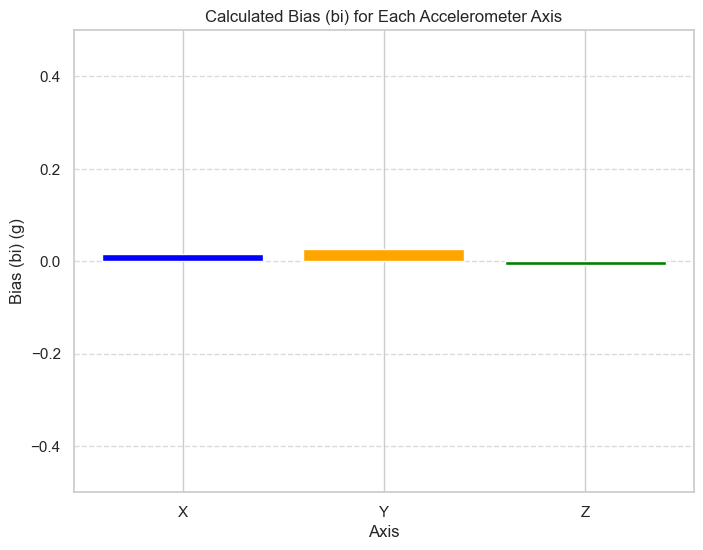

In [276]:
# Visualize Gain and Bias
# Bar plot for Gain
plt.figure(figsize=(8, 6))
gain_values = [gain[axis] for axis in axes]
plt.bar([axis.upper() for axis in axes], gain_values, color=['blue', 'orange', 'green'])
plt.title('Calculated Gain (ki) for Each Accelerometer Axis')
plt.xlabel('Axis')
plt.ylabel('Gain (ki)')
plt.ylim(0, 2)  # Adjust based on expected gain range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for Bias
plt.figure(figsize=(8, 6))
bias_values = [bias[axis] for axis in axes]
plt.bar([axis.upper() for axis in axes], bias_values, color=['blue', 'orange', 'green'])
plt.title('Calculated Bias (bi) for Each Accelerometer Axis')
plt.xlabel('Axis')
plt.ylabel('Bias (bi) (g)')
plt.ylim(-0.5, 0.5)  # Adjust based on expected bias range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Task 3 - Camera module calibration**

In [277]:
df_task3 = pd.read_csv('dataset1/data/task3/camera_module_calibration_task3.csv', header=None)

print(df_task3.head())
print(df_task3.info())

df_task3.columns = ['Distance_cm', 'Height_pixels']

CAMERA_TO_IR_DETECTOR = 1.6 
WALL_TO_WOODEN_LIST = 5.0 
H0 = 11.5

    0    1
0  32  176
1  35  164
2  40  146
3  45  131
4  50  119
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       25 non-null     int64
 1   1       25 non-null     int64
dtypes: int64(2)
memory usage: 532.0 bytes
None


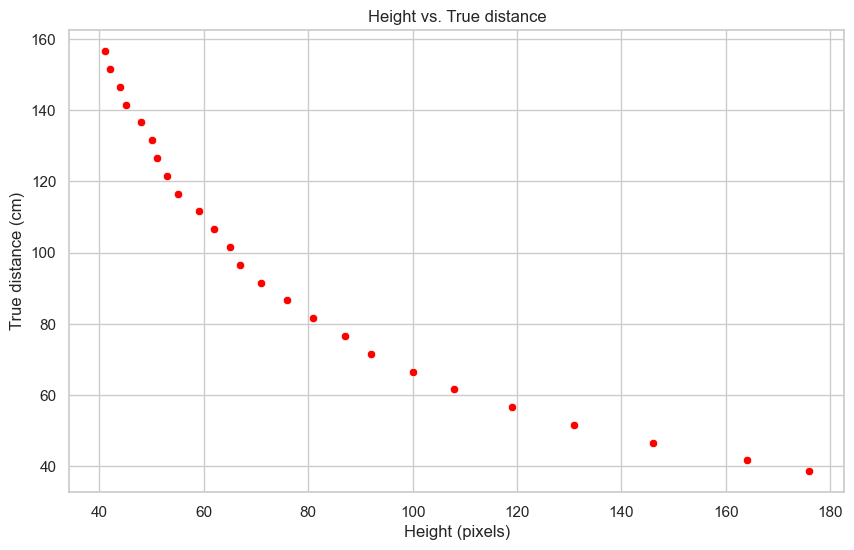

In [278]:
df_task3['x3'] = df_task3['Distance_cm'] + CAMERA_TO_IR_DETECTOR + WALL_TO_WOODEN_LIST

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_task3, x='Height_pixels', y='x3', color='red')
plt.title('Height vs. True distance')
plt.xlabel('Height (pixels)')
plt.ylabel('True distance (cm)')
plt.show()

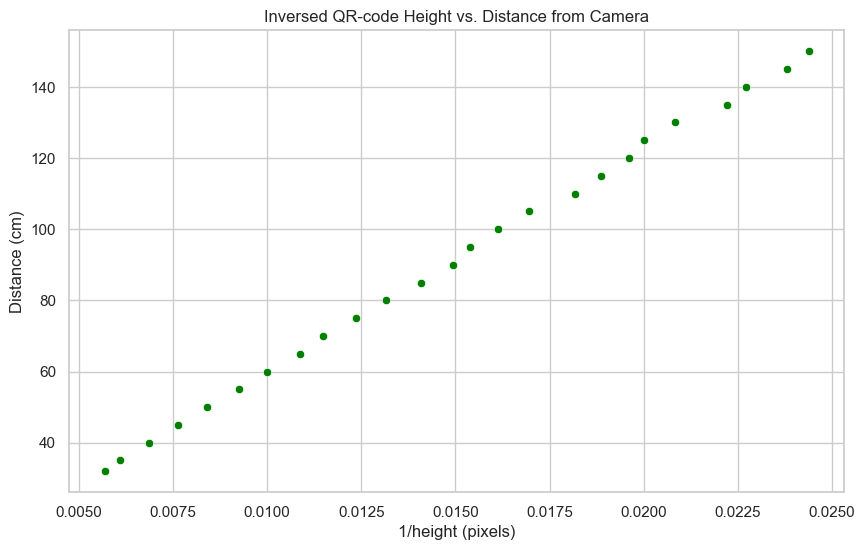

In [279]:
# Calculate inverse distance
df_task3['Inverse_Height_pixel'] = 1 / df_task3['Height_pixels']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_task3, x='Inverse_Height_pixel', y='Distance_cm', color='green')
plt.title('Inversed QR-code Height vs. Distance from Camera')
plt.xlabel('1/height (pixels)')
plt.ylabel('Distance (cm)')
plt.show()


Gradient (k): 6285.20 cm·pixels
Bias (b): 3.68 cm
Focal Length (f): 546.54 pixels


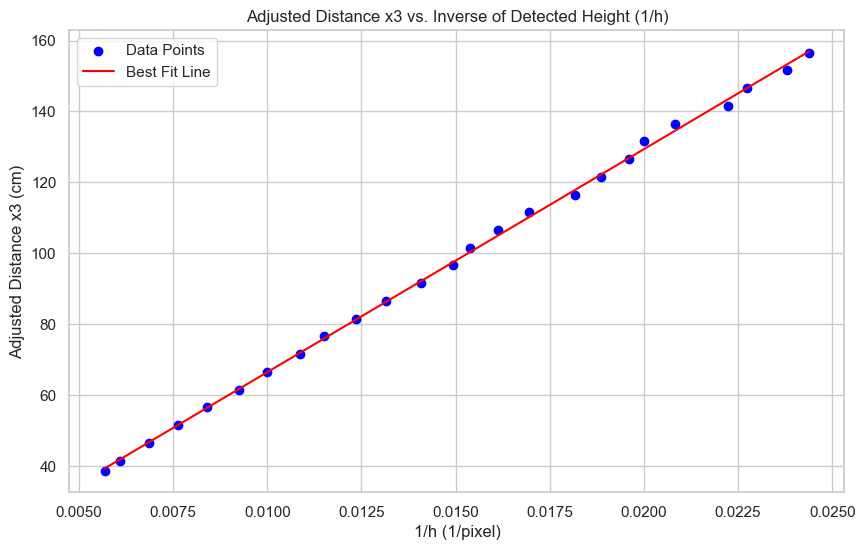

In [280]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_task3['Inverse_Height_pixel'], df_task3['x3'])

# Calculate focal length
focal_length = slope / H0

# Print the results
print(f"Gradient (k): {slope:.2f} cm·pixels")
print(f"Bias (b): {intercept:.2f} cm")
print(f"Focal Length (f): {focal_length:.2f} pixels")

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(df_task3['Inverse_Height_pixel'], df_task3['x3'], color='blue', label='Data Points')
plt.plot(df_task3['Inverse_Height_pixel'], slope * df_task3['Inverse_Height_pixel'] + intercept, color='red', label='Best Fit Line')
plt.title('Adjusted Distance x3 vs. Inverse of Detected Height (1/h)')
plt.xlabel('1/h (1/pixel)')
plt.ylabel('Adjusted Distance x3 (cm)')
plt.legend()
plt.grid(True)
plt.show()

## **Task 4 - Motor control**

In [281]:
df_task4 = pd.read_csv('dataset1/data/task4/robot_speed_task4.csv', header=None)
df_task4.columns = ['Distance_cm', 'Time_s']

print(df_task4.head())
print(df_task4.info())

   Distance_cm  Time_s
0           40    3.08
1           80    6.59
2          120    6.54
3          160    6.89
4          200    6.29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Distance_cm  7 non-null      int64  
 1   Time_s       7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes
None


In [282]:
df_task4['Delta_Distance_cm'] = df_task4['Distance_cm'].diff()

print("\nDistance Intervals (Delta_Distance_cm):")
print(df_task4[['Distance_cm', 'Delta_Distance_cm']])


Distance Intervals (Delta_Distance_cm):
   Distance_cm  Delta_Distance_cm
0           40                NaN
1           80               40.0
2          120               40.0
3          160               40.0
4          200               40.0
5          240               40.0
6          280               40.0


In [283]:
df_task4['Speed_cm_s'] = df_task4['Delta_Distance_cm'] / df_task4['Time_s']

print("\nCalculated Speeds (Speed_cm_s):")
print(df_task4[['Distance_cm', 'Time_s', 'Delta_Distance_cm', 'Speed_cm_s']])


Calculated Speeds (Speed_cm_s):
   Distance_cm  Time_s  Delta_Distance_cm  Speed_cm_s
0           40    3.08                NaN         NaN
1           80    6.59               40.0    6.069803
2          120    6.54               40.0    6.116208
3          160    6.89               40.0    5.805515
4          200    6.29               40.0    6.359300
5          240    6.48               40.0    6.172840
6          280    6.64               40.0    6.024096


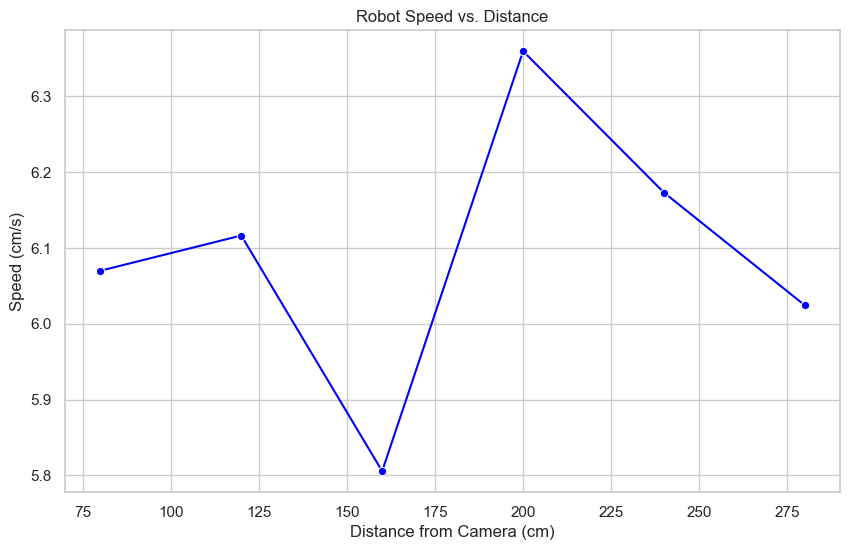

In [284]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_task4, x='Distance_cm', y='Speed_cm_s', marker='o', color='blue')
plt.title('Robot Speed vs. Distance')
plt.xlabel('Distance from Camera (cm)')
plt.ylabel('Speed (cm/s)')
plt.grid(True)
plt.show()


In [285]:
average_speed = df_task4['Speed_cm_s'].mean()
print(f"\nAverage Robot Speed: {average_speed:.2f} cm/s")


Average Robot Speed: 6.09 cm/s
